In [1]:
#Constants

# DATA_PATH = '../data/raw/survey_results_public.csv'
DF_PATH = '../data/processed/1_preprocessed_df.pkl'
DF_PATH2 = '../data/processed/2_descanalystics_df.pkl'
FIG_DIR = '../reports/figures'

In [2]:
#Load libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler


c:\Users\Yossef\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [3]:
pd.options.display.max_rows = 200
pd.options.display.max_colwidth = 120

In [4]:
raw_df = pd.read_pickle(DF_PATH)

In [5]:
df = raw_df.copy()

In [7]:
pro_programmers =  df[df['YearsCodePro'] > 0].shape[0] 
total_programmers = df.shape[0]
percentage = round((pro_programmers/total_programmers)*100, 2)

print(f'Pro Programmers: {pro_programmers} Total Programmers: {total_programmers} Proportion: {percentage}%')

Pro Programmers: 48754 Total Programmers: 65437 Proportion: 74.51%


In [8]:
df = df[df['YearsCodePro'] > 0]

In [9]:
df = df[df["DevType"].notnull()]

In [10]:
df.to_pickle(DF_PATH2)

In [11]:
df.sample().iloc[0]

ResponseId                                                                                                                                          58935
MainBranch                                                                                                                 I am a developer by profession
Age                                                                                                                                                  20.0
Employment                                                                                                      [Employed, full-time, Student, full-time]
RemoteWork                                                                                                                                      In-person
Check                                                                                                                                              Apples
CodingActivities                                                            

In [12]:
ROLE_COL = ['DevType']
TECH_COL = ['LanguageHaveWorkedWith', 
            'DatabaseHaveWorkedWith', 
            'MiscTechHaveWorkedWith', 
            'ToolsTechHaveWorkedWith',
            ]
OTHER_COL = ['PlatformHaveWorkedWith',
             'WebframeHaveWorkedWith', 
             'EmbeddedHaveWorkedWith',
             'NEWCollabToolsHaveWorkedWith']

In [13]:
df[TECH_COL]

,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith
1,"[Bash/Shell (all shells), Go, HTML/CSS, Java, JavaScript, Python, TypeScript]","[Dynamodb, MongoDB, PostgreSQL]",[],"[Docker, Homebrew, Kubernetes, npm, Vite, Webpack]"
2,[C#],[Firebase Realtime Database],"[.NET (5+) , .NET Framework (1.0 - 4.8), .NET MAUI]",[MSBuild]
6,[R],[],[],[]
9,"[HTML/CSS, JavaScript, TypeScript]","[MongoDB, MySQL, PostgreSQL, Redis]",[],"[npm, Webpack]"
11,"[C, C#, C++, Delphi, HTML/CSS, Java, JavaScript, PowerShell, SQL, TypeScript, VBA, Visual Basic (.Net)]","[Microsoft Access, Microsoft SQL Server, PostgreSQL, SQLite]","[.NET (5+) , .NET Framework (1.0 - 4.8), RabbitMQ, Xamarin]","[Docker, npm, Webpack, Yarn]"
...,...,...,...,...
65428,[],[],[],[]
65431,"[Bash/Shell (all shells), C, C#, C++, Delphi, Groovy, HTML/CSS, Java, JavaScript, Objective-C, PowerShell, Python, S...","[Couch DB, H2, Microsoft SQL Server, MySQL, Oracle, PostgreSQL, SQLite]","[.NET (5+) , .NET Framework (1.0 - 4.8), Cordova, Spring Framework]","[Chocolatey, Docker, Gradle, Homebrew, Kubernetes, npm, NuGet, Yarn]"
65432,[],[],[],[]
65434,[],[],[],[]


In [18]:
df[ROLE_COL[0]] == "Other (please specify):"

1        False
2        False
6        False
9        False
11       False
         ...  
65428    False
65431    False
65432    False
65434    False
65435    False
Name: DevType, Length: 48495, dtype: bool

In [20]:
# Replace 'Other (please specify):' with 'Other' in DevType column
df.loc[df[ROLE_COL[0]] == "Other (please specify):", ROLE_COL[0]] = "Other"

# Display the value counts for DevType column
print("Developer Type Distribution:")
print(df[ROLE_COL].value_counts())

Developer Type Distribution:
DevType                                      
Developer, full-stack                            16794
Developer, back-end                               9262
Developer, front-end                              2934
Developer, desktop or enterprise applications     2264
Developer, mobile                                 1814
Developer, embedded applications or devices       1489
Other                                             1453
Engineering manager                               1094
Data engineer                                     1046
Academic researcher                                998
DevOps specialist                                  940
Data scientist or machine learning specialist      900
Research & Development role                        841
Student                                            769
Senior Executive (C-Suite, VP, etc.)               699
Cloud infrastructure engineer                      581
Developer, game or graphics                  

In [21]:
df_dev = pd.get_dummies(df['DevType']).astype('int')
df_dev

,Academic researcher,Blockchain,Cloud infrastructure engineer,Data engineer,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,Developer Advocate,...,Marketing or sales professional,Other,Product manager,Project manager,Research & Development role,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65432,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
encoded_dfs = {}
for col in TECH_COL:
    # Fill NaN values with empty list
    df[col] = df[col].fillna('[]')
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(df[col]),
                            columns=binarizer.classes_,
                            index=df[col].index)
    encoded_dfs[col] = encoded_df
    print(f"Encoded {col} column")

Encoded LanguageHaveWorkedWith column
Encoded DatabaseHaveWorkedWith column
Encoded MiscTechHaveWorkedWith column
Encoded ToolsTechHaveWorkedWith column


In [23]:
print(encoded_dfs.keys())


dict_keys(['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith'])


In [108]:
type(encoded_dfs)

dict

In [33]:
df_mod = pd.concat(encoded_dfs, axis=1)

In [36]:
df_mod.head()

LanguageHaveWorkedWith                                                  \
                      Ada Apex Assembly Bash/Shell (all shells)  C C# C++   
1                       0    0        0                       1  0  0   0   
2                       0    0        0                       0  0  1   0   
6                       0    0        0                       0  0  0   0   
9                       0    0        0                       0  0  0   0   
11                      0    0        0                       0  1  1   1   

                          ... ToolsTechHaveWorkedWith                     \
   Clojure Cobol Crystal  ...                  Puppet Terraform Unity 3D   
1        0     0       0  ...                       0         0        0   
2        0     0       0  ...                       0         0        0   
6        0     0       0  ...                       0         0        0   
9        0     0       0  ...                       0         0        0   
11       0     0       0  ...                       0         0        0   

                                                                    
   Unreal Engine Visual Studio Solution Vite Webpack Yarn npm pnpm  
1              0                      0    1       1    0   1    0  
2              0                      0    0       0    0   0    0  
6              0                      0    0       0    0   0    0  
9              0                      0    0       1    0   1    0  
11             0                      0    0       1    1   1    0  

[5 rows x 157 columns]

In [37]:
df_mod.sample().iloc[0]

LanguageHaveWorkedWith   Ada                           0
                         Apex                          0
                         Assembly                      0
                         Bash/Shell (all shells)       0
                         C                             0
                         C#                            1
                         C++                           0
                         Clojure                       0
                         Cobol                         0
                         Crystal                       0
                         Dart                          0
                         Delphi                        0
                         Elixir                        0
                         Erlang                        0
                         F#                            0
                         Fortran                       0
                         GDScript                      0
                         Go    

In [39]:
pd.MultiIndex.from_product([ROLE_COL, df_dev.columns])

MultiIndex([('DevType',                           'Academic researcher'),
            ('DevType',                                    'Blockchain'),
            ('DevType',                 'Cloud infrastructure engineer'),
            ('DevType',                                 'Data engineer'),
            ('DevType',                      'Data or business analyst'),
            ('DevType', 'Data scientist or machine learning specialist'),
            ('DevType',                        'Database administrator'),
            ('DevType',                                      'Designer'),
            ('DevType',                             'DevOps specialist'),
            ('DevType',                            'Developer Advocate'),
            ('DevType',                          'Developer Experience'),
            ('DevType',                                 'Developer, AI'),
            ('DevType',                         'Developer, QA or test'),
            ('DevType',               

In [40]:
# Create MultiIndex columns for df_dev with ROLE_COL category
df_dev.columns = pd.MultiIndex.from_product([ROLE_COL, df_dev.columns])

# Concatenate df_dev with df horizontally
df_mod = pd.concat([df_mod, df_dev], axis=1)

In [41]:
df_mod

LanguageHaveWorkedWith                                                  \
                         Ada Apex Assembly Bash/Shell (all shells)  C C# C++   
1                          0    0        0                       1  0  0   0   
2                          0    0        0                       0  0  1   0   
6                          0    0        0                       0  0  0   0   
9                          0    0        0                       0  0  0   0   
11                         0    0        0                       0  1  1   1   
...                      ...  ...      ...                     ... .. ..  ..   
65428                      0    0        0                       0  0  0   0   
65431                      0    0        0                       1  1  1   1   
65432                      0    0        0                       0  0  0   0   
65434                      0    0        0                       0  0  0   0   
65435                      0    0        0                       0  1  0   1   

                             ...                         DevType        \
      Clojure Cobol Crystal  ... Marketing or sales professional Other   
1           0     0       0  ...                               0     0   
2           0     0       0  ...                               0     0   
6           0     0       0  ...                               0     0   
9           0     0       0  ...                               0     0   
11          0     0       0  ...                               0     0   
...       ...   ...     ...  ...                             ...   ...   
65428       0     0       0  ...                               0     0   
65431       0     0       0  ...                               0     0   
65432       0     0       0  ...                               0     0   
65434       0     0       0  ...                               0     0   
65435       0     0       0  ...                               0     0   

                                                                             \
      Product manager Project manager Research & Development role Scientist   
1                   0               0                           0         0   
2                   0               0                           0         0   
6                   0               0                           0         0   
9                   0               0                           0         0   
11                  0               0                           0         0   
...               ...             ...                         ...       ...   
65428               0               0                           0         0   
65431               0               0                           0         0   
65432               0               0                           0         0   
65434               0               0                           0         0   
65435               0               0                           0         0   

                                                                          \
      Security professional Senior Executive (C-Suite, VP, etc.) Student   
1                         0                                    0       0   
2                         0                                    0       0   
6                         0                                    0       0   
9                         0                                    0       0   
11                        0                                    0       0   
...                     ...                                  ...     ...   
65428                     0                                    0       0   
65431                     0                                    0       0   
65432                     0                                    0       0   
65434                     0                                    0       0   
65435                     0                                   

# Display jobs frequency

In [42]:
jobs_freq = df_mod['DevType'].copy().sum().sort_values().reset_index()

In [43]:
jobs_freq.columns = ['DevType', 'Frequency']

<Axes: ylabel='DevType'>

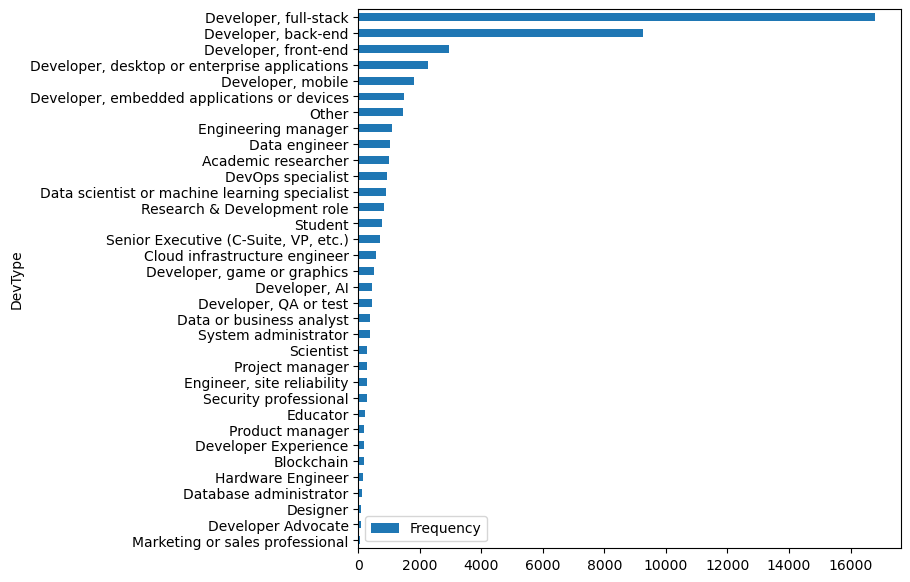

In [44]:
jobs_freq.plot(kind='barh', x='DevType', y='Frequency', figsize=(7, 7))

# Display the Age vs the PRO experiance

In [45]:
df['YearsCodePro'].dtype

dtype('float32')

# Display skills frequency

In [46]:
skills_freq = df_mod.copy().drop('DevType', axis=1).sum().reset_index()

C:\Users\Yossef\AppData\Local\Temp\ipykernel_43160\850426922.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  skills_freq = df_mod.copy().drop('DevType', axis=1).sum().reset_index()


In [48]:
skills_freq.columns = ['group', 'skill', 'freq']

In [49]:
# Make a treemap plot 

fig = px.treemap(skills_freq, 
                 path=['group', 'skill'], 
                 color_continuous_scale='deep',
                 values='freq',
                 color='freq',
                 title='Skills Frequency by Group',)

fig.update_layout(width=1400, height=800)
fig.show()

fig.write_html(os.path.join(FIG_DIR, 'treemap_skills_freq.html'))

# Create Jobs & Skills Heatmap

In [50]:
df_mod['DevType']

,Academic researcher,Blockchain,Cloud infrastructure engineer,Data engineer,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,Developer Advocate,...,Marketing or sales professional,Other,Product manager,Project manager,Research & Development role,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65432,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
sorted_roles = df_mod['DevType'].sum().sort_values().index.tolist()
sorted_roles

['Marketing or sales professional',
 'Developer Advocate',
 'Designer',
 'Database administrator',
 'Hardware Engineer',
 'Blockchain',
 'Developer Experience',
 'Product manager',
 'Educator',
 'Security professional',
 'Engineer, site reliability',
 'Project manager',
 'Scientist',
 'System administrator',
 'Data or business analyst',
 'Developer, QA or test',
 'Developer, AI',
 'Developer, game or graphics',
 'Cloud infrastructure engineer',
 'Senior Executive (C-Suite, VP, etc.)',
 'Student',
 'Research & Development role',
 'Data scientist or machine learning specialist',
 'DevOps specialist',
 'Academic researcher',
 'Data engineer',
 'Engineering manager',
 'Other',
 'Developer, embedded applications or devices',
 'Developer, mobile',
 'Developer, desktop or enterprise applications',
 'Developer, front-end',
 'Developer, back-end',
 'Developer, full-stack']

In [52]:
sorted_skills = df_mod.drop('DevType', axis=1).sum().droplevel(0).sort_values(ascending=False).index.tolist()
sorted_skills

C:\Users\Yossef\AppData\Local\Temp\ipykernel_43160\3067856254.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



['JavaScript',
 'Docker',
 'SQL',
 'HTML/CSS',
 'Python',
 'npm',
 'PostgreSQL',
 'TypeScript',
 'Bash/Shell (all shells)',
 'MySQL',
 'SQLite',
 'Java',
 'Pip',
 'C#',
 'Microsoft SQL Server',
 'Homebrew',
 'MongoDB',
 '.NET (5+) ',
 'C++',
 'Kubernetes',
 'Redis',
 'Make',
 'Yarn',
 'Webpack',
 'PHP',
 'Vite',
 'C',
 'NuGet',
 'Pandas',
 'MariaDB',
 'NumPy',
 'Maven (build tool)',
 'PowerShell',
 'Visual Studio Solution',
 'Go',
 'Gradle',
 '.NET Framework (1.0 - 4.8)',
 'Elasticsearch',
 'Rust',
 'Terraform',
 'MSBuild',
 'RabbitMQ',
 'Kotlin',
 'Spring Framework',
 'Oracle',
 'APT',
 'Composer',
 'pnpm',
 'Apache Kafka',
 'Ansible',
 'Dynamodb',
 'Chocolatey',
 'Scikit-Learn',
 'Torch/PyTorch',
 'TensorFlow',
 'Flutter',
 'React Native',
 'Opencv',
 'Dart',
 'Ruby',
 'Lua',
 'Qt',
 'Pacman',
 'Podman',
 'Swift',
 'Electron',
 'Firebase Realtime Database',
 'Cloud Firestore',
 'BigQuery',
 'OpenGL',
 'CUDA',
 'Assembly',
 'Unity 3D',
 'Visual Basic (.Net)',
 'R',
 'Groovy',
 'VBA',


In [53]:
skills = []

# For each role, calculate the percentage of each skill
for role in sorted_roles:
    # Filter for the role
    role_mask = (df_mod[('DevType', role)] == 1)

    #For each skill column, calculate mean of the one-hot-encoded -> percentage
    skills_role = pd.concat({tech_col: df_mod.loc[role_mask, tech_col].mean() * 100
                             for tech_col in TECH_COL})

    # Append to original list
    skills.append(skills_role)

In [124]:
skills

[LanguageHaveWorkedWith   Ada                            2.439024
                          Apex                           0.000000
                          Assembly                       4.878049
                          Bash/Shell (all shells)       17.073171
                          C                              9.756098
                          C#                             7.317073
                          C++                           14.634146
                          Clojure                        0.000000
                          Cobol                          2.439024
                          Crystal                        0.000000
                          Dart                           2.439024
                          Delphi                         0.000000
                          Elixir                         0.000000
                          Erlang                         2.439024
                          F#                             0.000000
          

In [125]:
# Concat and format
skills = pd.concat(skills, axis=1)

In [126]:
skills.columns = sorted_roles

In [127]:
skills = skills.reset_index(level=0, drop=True) 

In [128]:
skills = skills.loc[sorted_skills]

In [129]:
skills = skills.T
skills

,JavaScript,Docker,SQL,HTML/CSS,Python,npm,PostgreSQL,TypeScript,Bash/Shell (all shells),MySQL,...,Couchbase,OCaml,Presto,Crystal,Datomic,Zephyr,EventStoreDB,Nim,RavenDB,TiDB
Marketing or sales professional,65.853659,26.829268,46.341463,75.609756,43.902439,29.268293,26.829268,14.634146,17.073171,29.268293,...,2.439024,2.439024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Developer Advocate,63.636364,56.818182,38.636364,52.272727,48.863636,53.409091,44.318182,42.045455,38.636364,32.954545,...,1.136364,1.136364,1.136364,0.000000,0.000000,1.136364,1.136364,0.000000,0.000000,0.000000
Designer,71.000000,28.000000,31.000000,65.000000,39.000000,38.000000,29.000000,30.000000,25.000000,32.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
Database administrator,31.250000,20.312500,85.156250,29.687500,43.750000,10.937500,45.312500,6.250000,40.625000,35.156250,...,2.343750,0.781250,0.000000,2.343750,0.000000,0.000000,0.000000,0.000000,0.000000,0.781250
Hardware Engineer,32.051282,33.974359,19.230769,26.282051,75.641026,15.384615,16.025641,11.538462,48.717949,23.717949,...,0.000000,1.923077,0.000000,0.000000,0.000000,1.282051,0.000000,0.641026,0.000000,0.000000
Blockchain,57.068063,58.638743,33.507853,39.790576,40.837696,48.167539,52.356021,48.691099,37.172775,27.225131,...,1.570681,3.141361,1.047120,1.570681,2.617801,1.047120,2.617801,2.617801,1.047120,2.094241
Developer Experience,56.020942,58.638743,34.554974,36.649215,50.785340,39.790576,43.455497,42.408377,48.691099,32.460733,...,0.523560,2.094241,2.094241,1.570681,0.000000,0.000000,0.000000,1.047120,0.000000,0.000000
Product manager,62.871287,46.039604,63.366337,50.990099,54.455446,41.089109,40.594059,29.207921,31.188119,36.633663,...,0.990099,1.485149,0.990099,0.495050,0.495050,0.990099,0.990099,0.990099,1.485149,1.485149
Educator,61.206897,37.068966,47.844828,56.034483,69.827586,43.103448,37.068966,25.000000,40.086207,35.775862,...,1.293103,1.724138,0.000000,0.862069,0.431034,0.000000,0.000000,0.431034,0.000000,0.000000
Security professional,52.416357,60.594796,36.059480,41.263941,75.836431,30.483271,45.724907,24.907063,56.877323,36.431227,...,0.371747,1.486989,0.371747,0.743494,0.371747,0.371747,0.000000,1.486989,0.000000,0.743494


In [130]:
fig = go.Figure(data=go.Heatmap(z=skills, x=skills.columns,y=skills.index, colorscale='magma', ygap=1))
fig.update_layout(width=2500, height=1000)
fig.show()
fig.write_html(os.path.join(FIG_DIR, 'heatmap.html'))

# Create Jobs dendrogram


In [131]:
skills

,JavaScript,Docker,SQL,HTML/CSS,Python,npm,PostgreSQL,TypeScript,Bash/Shell (all shells),MySQL,...,Couchbase,OCaml,Presto,Crystal,Datomic,Zephyr,EventStoreDB,Nim,RavenDB,TiDB
Marketing or sales professional,65.853659,26.829268,46.341463,75.609756,43.902439,29.268293,26.829268,14.634146,17.073171,29.268293,...,2.439024,2.439024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Developer Advocate,63.636364,56.818182,38.636364,52.272727,48.863636,53.409091,44.318182,42.045455,38.636364,32.954545,...,1.136364,1.136364,1.136364,0.000000,0.000000,1.136364,1.136364,0.000000,0.000000,0.000000
Designer,71.000000,28.000000,31.000000,65.000000,39.000000,38.000000,29.000000,30.000000,25.000000,32.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
Database administrator,31.250000,20.312500,85.156250,29.687500,43.750000,10.937500,45.312500,6.250000,40.625000,35.156250,...,2.343750,0.781250,0.000000,2.343750,0.000000,0.000000,0.000000,0.000000,0.000000,0.781250
Hardware Engineer,32.051282,33.974359,19.230769,26.282051,75.641026,15.384615,16.025641,11.538462,48.717949,23.717949,...,0.000000,1.923077,0.000000,0.000000,0.000000,1.282051,0.000000,0.641026,0.000000,0.000000
Blockchain,57.068063,58.638743,33.507853,39.790576,40.837696,48.167539,52.356021,48.691099,37.172775,27.225131,...,1.570681,3.141361,1.047120,1.570681,2.617801,1.047120,2.617801,2.617801,1.047120,2.094241
Developer Experience,56.020942,58.638743,34.554974,36.649215,50.785340,39.790576,43.455497,42.408377,48.691099,32.460733,...,0.523560,2.094241,2.094241,1.570681,0.000000,0.000000,0.000000,1.047120,0.000000,0.000000
Product manager,62.871287,46.039604,63.366337,50.990099,54.455446,41.089109,40.594059,29.207921,31.188119,36.633663,...,0.990099,1.485149,0.990099,0.495050,0.495050,0.990099,0.990099,0.990099,1.485149,1.485149
Educator,61.206897,37.068966,47.844828,56.034483,69.827586,43.103448,37.068966,25.000000,40.086207,35.775862,...,1.293103,1.724138,0.000000,0.862069,0.431034,0.000000,0.000000,0.431034,0.000000,0.000000
Security professional,52.416357,60.594796,36.059480,41.263941,75.836431,30.483271,45.724907,24.907063,56.877323,36.431227,...,0.371747,1.486989,0.371747,0.743494,0.371747,0.371747,0.000000,1.486989,0.000000,0.743494


In [132]:
skills.columns

Index(['JavaScript', 'Docker', 'SQL', 'HTML/CSS', 'Python', 'npm',
       'PostgreSQL', 'TypeScript', 'Bash/Shell (all shells)', 'MySQL',
       ...
       'Couchbase', 'OCaml', 'Presto', 'Crystal', 'Datomic', 'Zephyr',
       'EventStoreDB', 'Nim', 'RavenDB', 'TiDB'],
      dtype='object', length=157)

In [133]:
skills.index

Index(['Marketing or sales professional', 'Developer Advocate', 'Designer',
       'Database administrator', 'Hardware Engineer', 'Blockchain',
       'Developer Experience', 'Product manager', 'Educator',
       'Security professional', 'Engineer, site reliability',
       'Project manager', 'Scientist', 'System administrator',
       'Data or business analyst', 'Developer, QA or test', 'Developer, AI',
       'Developer, game or graphics', 'Cloud infrastructure engineer',
       'Senior Executive (C-Suite, VP, etc.)', 'Student',
       'Research & Development role',
       'Data scientist or machine learning specialist', 'DevOps specialist',
       'Academic researcher', 'Data engineer', 'Engineering manager', 'Other',
       'Developer, embedded applications or devices', 'Developer, mobile',
       'Developer, desktop or enterprise applications', 'Developer, front-end',
       'Developer, back-end', 'Developer, full-stack'],
      dtype='object')

In [134]:
fig = ff.create_dendrogram(skills, labels=skills.index, orientation='bottom', color_threshold=0)
fig.update_layout(height=750, width=1800, showlegend=False)
fig.show()

# Normalizing features

In [135]:
std_skills = StandardScaler().fit_transform(skills)
std_skills = pd.DataFrame(std_skills, columns=skills.columns, index=skills.index)

In [136]:
fig = go.Figure(data=go.Heatmap(z=std_skills, x=skills.columns,y=skills.index, colorscale='magma', ygap=1))
fig.update_layout(width=3000, height=900)
fig.show()
fig.write_html(os.path.join(FIG_DIR, 'normalized_heatmap.html'))

# Job profiles

In [137]:
sorted_roles

['Marketing or sales professional',
 'Developer Advocate',
 'Designer',
 'Database administrator',
 'Hardware Engineer',
 'Blockchain',
 'Developer Experience',
 'Product manager',
 'Educator',
 'Security professional',
 'Engineer, site reliability',
 'Project manager',
 'Scientist',
 'System administrator',
 'Data or business analyst',
 'Developer, QA or test',
 'Developer, AI',
 'Developer, game or graphics',
 'Cloud infrastructure engineer',
 'Senior Executive (C-Suite, VP, etc.)',
 'Student',
 'Research & Development role',
 'Data scientist or machine learning specialist',
 'DevOps specialist',
 'Academic researcher',
 'Data engineer',
 'Engineering manager',
 'Other',
 'Developer, embedded applications or devices',
 'Developer, mobile',
 'Developer, desktop or enterprise applications',
 'Developer, front-end',
 'Developer, back-end',
 'Developer, full-stack']

In [138]:
role = np.random.choice(sorted_roles)
role

'Blockchain'

In [139]:
single_role_skills = pd.concat([skills.loc[role], std_skills.loc[role]], axis=1)
single_role_skills.columns = ['percentage', 'specificity']
single_role_skills = single_role_skills.sort_values('percentage')

In [140]:
threshold = 25
specificity_threshold = .5

single_role_skills = single_role_skills[
    (single_role_skills['percentage'] > threshold) & 
    (single_role_skills['specificity'] > specificity_threshold)
]

fig = px.bar(df_mod, 
             y=single_role_skills.index, 
             x=single_role_skills['percentage'], 
             color=single_role_skills['specificity'],
             color_continuous_scale='orrd', 
             range_color=[std_skills.values.min(),std_skills.values.max()],
             orientation='h')

fig.update_layout(width=800, height=500, title=role)
fig.show()

In [141]:
def plot_skills(role, threshold=25, specificity_threshold=0.5):
    # Get and combine data
    single_role_skills = pd.concat([
        skills.loc[role], 
        std_skills.loc[role]
    ], axis=1)
    single_role_skills.columns = ['percentage', 'specificity']
    
    # Filter and sort by percentage
    single_role_skills = single_role_skills[
        (single_role_skills['percentage'] > threshold) & 
        (single_role_skills['specificity'] > specificity_threshold)
    ].sort_values('percentage', ascending=True)  # Add sorting here
    
    if single_role_skills.empty:
        print("#"*200)
        print(f'No skills found for {role} with threshold {threshold} and specificity threshold {specificity_threshold}')
        print("#"*200)
        return
    
    # Create visualization
    fig = px.bar(
        df_mod,
        y=single_role_skills.index,
        x=single_role_skills['percentage'],
        color=single_role_skills['specificity'],
        color_continuous_scale='orrd',
        range_color=[std_skills.values.min(), std_skills.values.max()],
        orientation='h'
    )
    
    fig.update_layout(width=800, height=500, title=role)
    fig.show()

In [142]:
for role in sorted_roles:
    plot_skills(role , 10 , 1)

########################################################################################################################################################################################################
No skills found for Other with threshold 10 and specificity threshold 1
########################################################################################################################################################################################################
